In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
x=df.drop("Species",axis=1).values
y=df["Species"].values

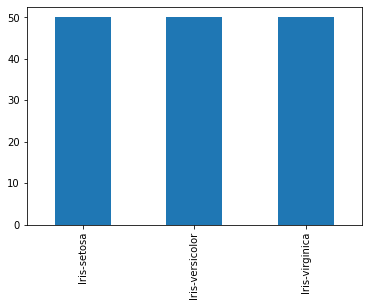

In [5]:
df_1=df["Species"].value_counts().plot(kind='bar')

In [6]:
le=LabelEncoder()
df["Species"]=le.fit_transform(df["Species"])
df["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42,stratify=y)

In [8]:
def trainKNN(X_train,y_train,k):
    Classifier=KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    Classifier.fit(x_train,y_train)
    return Classifier

In [10]:
def PredictClassifier(x_test,Classifier):
    y_pred=Classifier.predict(x_test)
    return y_pred

In [12]:
def CalculateAccuracy(y_pred,y_test):
    accuracy=accuracy_score(y_pred,y_test)
    return accuracy

In [13]:
kvalues=[x for x in range(1,50,6)]
Accuracylist=[]
for k in tqdm(kvalues):
    knnclassifier=trainKNN(x_train,y_train,k)
    y_pred=PredictClassifier(x_test,knnclassifier)
    acc=CalculateAccuracy(y_pred,y_test)
    Accuracylist.append(acc)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 25.19it/s]


In [27]:
print(Accuracylist)

[1.0, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 1.0, 1.0, 1.0]


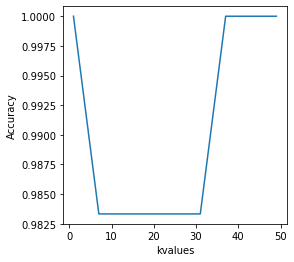

In [14]:
p=plt.figure(figsize= (4,4))
ax=plt.subplot()
plt.plot(kvalues,Accuracylist)
ax.set_xlabel('kvalues',fontsize=10)
ax.set_ylabel('Accuracy',fontsize=10)
plt.show()